In [1]:
# Import necessary libraries
import pandas as pd
import os
import pickle
import graph_tool.all as gt
from collections import defaultdict, Counter
from sbmtm import sbmtm  # Ensure sbmtm class is in sbmtm.py file
import numpy as np
import matplotlib.pyplot as plt

# Read the data
df = pd.read_excel('ekko_Data_MSc.xlsx', sheet_name='Clean_Transfers')
df.head()


,_id,accountId,customerId,IMD_Decile,createdAt,amount.currency,amount.exponent,amount.value,externalParty.merchantCategoryCode,externalParty.transactionCategory,MCC_List,transactionFootPrint.carbonEmissionInGrams,transactionType.code,transactionType.direction
0,6220c8e159378700114a8722,61c5e725941a0600135559cf,4ec3aa2c-1dcd-47a7-b20c-ce7083ddbab8,9,2022-03-03T13:55:45.434Z,GBP,2,5067,742,OTHER,Not_Found,9852.56,REDEMPTION,DEBIT
1,62c30db86daa10001266325e,6215fbb82c463a001166ad8f,a4c47159-e445-4b31-8ea9-6c5852bd7095,8,2022-07-04T15:56:40.950Z,GBP,2,4600,742,OTHER,Not_Found,9121.95,REDEMPTION,DEBIT
2,62e0fcf555577b00112d3176,625e873608ff4300110c62af,b5a28615-7994-458e-8903-8086ac77eb49,Not_Found,2022-07-27T08:53:09.433Z,GBP,2,5000,742,OTHER,Not_Found,9915.17,REDEMPTION,DEBIT
3,6241b6536406d6001265085d,61f7b9a0166edc0011a85572,f1211afd-6692-4625-a39b-bb820f50d3bb,9,2022-03-28T13:21:23.710Z,GBP,2,599,780,OTHER,Not_Found,1214.56,REDEMPTION,DEBIT
4,62c44ba62e447d00129fc612,61c453eebcc5e4001133f68a,fd654d64-f795-401d-a5fe-76cfa2cfa01a,10,2022-07-05T14:33:10.080Z,GBP,2,600,1520,SHOPPING,General Contractor/Residential Building,15224.93,REDEMPTION,DEBIT


In [2]:
# Extract CustomerID and MCC_List
customer_ids = df['customerId'].tolist()
mcc_list = df['MCC_List'].tolist()

# Generate input format required for Customer-MCC bipartite graph
customer_mcc_data = defaultdict(Counter)
for customer, mcc in zip(customer_ids, mcc_list):
    customer_mcc_data[customer][mcc] += 1  # Record the number of transactions for each customer in each MCC

# Create the model
model = sbmtm()

# Create Customer-MCC network
list_texts = [list(counter.elements()) for counter in customer_mcc_data.values()]
documents = list(customer_mcc_data.keys())
model.make_graph(list_texts, documents=documents, counts=True)


In [3]:
# Set random seed
SEED = 50
gt.seed_rng(SEED)  # Set seed for graph-tool's random number generator to ensure consistent results

# Fit the model with multiple initializations
model.fit(n_init=100)

# Print the lowest entropy and the number of blocks in the state at level 0
print('The lowest entropy was {}, and the state has {} blocks at level 0'.format(model.state.entropy(), model.state.get_levels()[0].get_nonempty_B()))


<NestedBlockState object, with base <BlockState object with 1208 blocks (115 nonempty), degree-corrected, for graph <Graph object, undirected, with 1208 vertices and 5820 edges, 2 internal vertex properties, 1 internal edge property, at 0x7f58a961df40>, at 0x7f58475126c0>, and 5 levels of sizes [(1208, 115), (115, 20), (20, 3), (3, 2), (2, 1)] at 0x7f587e3551f0>
<NestedBlockState object, with base <BlockState object with 1208 blocks (123 nonempty), degree-corrected, for graph <Graph object, undirected, with 1208 vertices and 5820 edges, 2 internal vertex properties, 1 internal edge property, at 0x7f58a961df40>, at 0x7f587dcc39e0>, and 5 levels of sizes [(1208, 123), (123, 26), (26, 3), (3, 2), (2, 1)] at 0x7f587de3eb40>
<NestedBlockState object, with base <BlockState object with 1208 blocks (81 nonempty), degree-corrected, for graph <Graph object, undirected, with 1208 vertices and 5820 edges, 2 internal vertex properties, 1 internal edge property, at 0x7f58a961df40>, at 0x7f587e269c10

<NestedBlockState object, with base <BlockState object with 1208 blocks (95 nonempty), degree-corrected, for graph <Graph object, undirected, with 1208 vertices and 5820 edges, 2 internal vertex properties, 1 internal edge property, at 0x7f58a961df40>, at 0x7f587e26a5d0>, and 4 levels of sizes [(1208, 95), (95, 21), (21, 2), (2, 1)] at 0x7f587e3a8470>
<NestedBlockState object, with base <BlockState object with 1208 blocks (144 nonempty), degree-corrected, for graph <Graph object, undirected, with 1208 vertices and 5820 edges, 2 internal vertex properties, 1 internal edge property, at 0x7f58a961df40>, at 0x7f5888d9f4d0>, and 6 levels of sizes [(1208, 144), (144, 38), (38, 8), (8, 3), (3, 2), (2, 1)] at 0x7f587e3a8470>
<NestedBlockState object, with base <BlockState object with 1208 blocks (104 nonempty), degree-corrected, for graph <Graph object, undirected, with 1208 vertices and 5820 edges, 2 internal vertex properties, 1 internal edge property, at 0x7f58a961df40>, at 0x7f587e550d70>,

<NestedBlockState object, with base <BlockState object with 1208 blocks (93 nonempty), degree-corrected, for graph <Graph object, undirected, with 1208 vertices and 5820 edges, 2 internal vertex properties, 1 internal edge property, at 0x7f58a961df40>, at 0x7f587e272960>, and 4 levels of sizes [(1208, 93), (93, 20), (20, 2), (2, 1)] at 0x7f587e339310>
<NestedBlockState object, with base <BlockState object with 1208 blocks (143 nonempty), degree-corrected, for graph <Graph object, undirected, with 1208 vertices and 5820 edges, 2 internal vertex properties, 1 internal edge property, at 0x7f58a961df40>, at 0x7f58476dc6e0>, and 5 levels of sizes [(1208, 143), (143, 36), (36, 5), (5, 2), (2, 1)] at 0x7f58476de990>
<NestedBlockState object, with base <BlockState object with 1208 blocks (147 nonempty), degree-corrected, for graph <Graph object, undirected, with 1208 vertices and 5820 edges, 2 internal vertex properties, 1 internal edge property, at 0x7f58a961df40>, at 0x7f5888dc2f30>, and 6 l

<NestedBlockState object, with base <BlockState object with 1208 blocks (117 nonempty), degree-corrected, for graph <Graph object, undirected, with 1208 vertices and 5820 edges, 2 internal vertex properties, 1 internal edge property, at 0x7f58a961df40>, at 0x7f587e3e2e70>, and 5 levels of sizes [(1208, 117), (117, 29), (29, 3), (3, 2), (2, 1)] at 0x7f587dea9430>
<NestedBlockState object, with base <BlockState object with 1208 blocks (85 nonempty), degree-corrected, for graph <Graph object, undirected, with 1208 vertices and 5820 edges, 2 internal vertex properties, 1 internal edge property, at 0x7f58a961df40>, at 0x7f5847767bc0>, and 5 levels of sizes [(1208, 85), (85, 16), (16, 3), (3, 2), (2, 1)] at 0x7f584761ff80>
<NestedBlockState object, with base <BlockState object with 1208 blocks (139 nonempty), degree-corrected, for graph <Graph object, undirected, with 1208 vertices and 5820 edges, 2 internal vertex properties, 1 internal edge property, at 0x7f58a961df40>, at 0x7f587e4f6f60>,

<NestedBlockState object, with base <BlockState object with 1208 blocks (134 nonempty), degree-corrected, for graph <Graph object, undirected, with 1208 vertices and 5820 edges, 2 internal vertex properties, 1 internal edge property, at 0x7f58a961df40>, at 0x7f587e286360>, and 5 levels of sizes [(1208, 134), (134, 21), (21, 5), (5, 2), (2, 1)] at 0x7f587e3fac00>
<NestedBlockState object, with base <BlockState object with 1208 blocks (124 nonempty), degree-corrected, for graph <Graph object, undirected, with 1208 vertices and 5820 edges, 2 internal vertex properties, 1 internal edge property, at 0x7f58a961df40>, at 0x7f587e6d7860>, and 5 levels of sizes [(1208, 124), (124, 32), (32, 5), (5, 2), (2, 1)] at 0x7f587e666b10>
<NestedBlockState object, with base <BlockState object with 1208 blocks (136 nonempty), degree-corrected, for graph <Graph object, undirected, with 1208 vertices and 5820 edges, 2 internal vertex properties, 1 internal edge property, at 0x7f58a961df40>, at 0x7f584ff2b26

In [4]:
# Create output directory
output_dir = './Results'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save the model
with open(os.path.join(output_dir, 'minimized_model_seed_{}.pkl'.format(SEED)), 'wb') as f:
    pickle.dump(model, f)

# Load the model
with open(os.path.join(output_dir, 'minimized_model_seed_{}.pkl'.format(SEED)), 'rb') as f:
    model_100 = pickle.load(f)

print('This state has {} blocks at level 0, {} at level 1, and its entropy is {:.2f}'.format(
    model_100.state.get_levels()[0].get_nonempty_B(),
    model_100.state.get_levels()[1].get_nonempty_B(),
    model_100.state.entropy()))


This state has 124 blocks at level 0, 32 at level 1, and its entropy is 30385.89


In [5]:
# Further optimize the model with multiflip MCMC
starting_entropy = model_100.state.entropy()
entropy_gain_multiflip = [model_100.state.multiflip_mcmc_sweep(beta=np.inf, niter=10)[0] for _ in range(1000)]

# Compute the likelihood difference based on the entropy changes
entropy_diff = np.cumsum(np.array(entropy_gain_multiflip))
entropy_diff_positive = -entropy_diff
entropy_exp_10 = entropy_diff_positive / (np.log(2) + np.log(5))
entropy_likelihood = np.power(10, entropy_exp_10)

with open(os.path.join(output_dir, 'entropy_likelihood.pkl'), 'wb') as f:
    pickle.dump(entropy_likelihood, f)

with open(os.path.join(output_dir, 'multiflip_mcmc_model_seed_{}.pkl'.format(SEED)), 'wb') as f:
    pickle.dump(model_100, f)


/tmp/ipykernel_1470/595600982.py:9: RuntimeWarning: overflow encountered in power
  entropy_likelihood = np.power(10, entropy_exp_10)


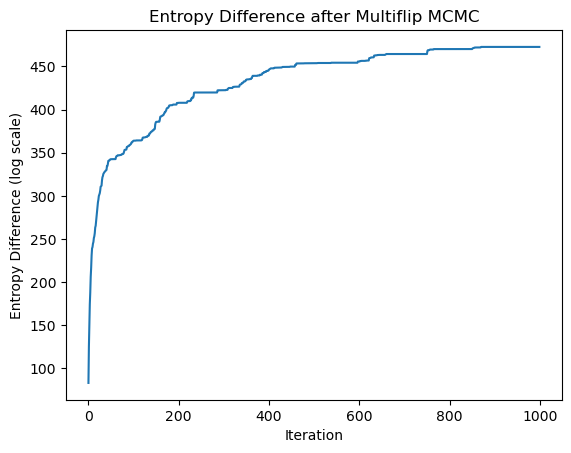

In [6]:
# Plot the entropy difference
plt.plot(entropy_exp_10)
plt.xlabel('Iteration')
plt.ylabel('Entropy Difference (log scale)')
plt.title('Entropy Difference after Multiflip MCMC')
plt.savefig(os.path.join(output_dir, 'entropy_difference_plot.png'))
plt.show()


In [7]:
# Generate customer clusters and save as CSV file
clusters = model_100.clusters()
cluster_data = []

for cluster_id, customers in clusters.items():
    for customer, prob in customers:
        cluster_data.append([cluster_id, customer, prob])

cluster_df = pd.DataFrame(cluster_data, columns=['ClusterID', 'CustomerID', 'Probability'])
cluster_df.to_csv(os.path.join(output_dir, 'customer_clusters.csv'), index=False)

print("Customer clusters saved to 'customer_clusters.csv'")


Customer clusters saved to 'customer_clusters.csv'


In [8]:
import pandas as pd
import os

# Read the customer clusters data
customer_clusters = pd.read_csv('./Results/customer_clusters.csv')

# Read the original data
df = pd.read_excel('ekko_Data_MSc.xlsx', sheet_name='Clean_Transfers')

# Display the head of both dataframes to ensure they are read correctly
customer_clusters.head(), df.head()


(   ClusterID                            CustomerID  Probability
 0          0  4ec3aa2c-1dcd-47a7-b20c-ce7083ddbab8          1.0
 1          0  187bd84b-20c7-45c7-8044-0fdb586e28a1          1.0
 2          1  a4c47159-e445-4b31-8ea9-6c5852bd7095          1.0
 3          1  fcfd36e4-da5e-42d1-8769-8213878b08fe          1.0
 4          1  b2a6900a-e6e6-4875-bf1b-b41c13c0dfc8          1.0,
                         _id                 accountId  \
 0  6220c8e159378700114a8722  61c5e725941a0600135559cf   
 1  62c30db86daa10001266325e  6215fbb82c463a001166ad8f   
 2  62e0fcf555577b00112d3176  625e873608ff4300110c62af   
 3  6241b6536406d6001265085d  61f7b9a0166edc0011a85572   
 4  62c44ba62e447d00129fc612  61c453eebcc5e4001133f68a   
 
                              customerId IMD_Decile                 createdAt  \
 0  4ec3aa2c-1dcd-47a7-b20c-ce7083ddbab8          9  2022-03-03T13:55:45.434Z   
 1  a4c47159-e445-4b31-8ea9-6c5852bd7095          8  2022-07-04T15:56:40.950Z   
 2  b5a28615-799

In [9]:
# Merge customer clusters with the carbon emission data
merged_df = pd.merge(customer_clusters, df[['customerId', 'transactionFootPrint.carbonEmissionInGrams']], 
                     left_on='CustomerID', right_on='customerId', how='left')

# Calculate the average carbon emission for each cluster
cluster_emission = merged_df.groupby('ClusterID')['transactionFootPrint.carbonEmissionInGrams'].mean().reset_index()
cluster_emission.columns = ['ClusterID', 'AvgCarbonEmission']

# Sort clusters by average carbon emission
sorted_clusters = cluster_emission.sort_values(by='AvgCarbonEmission')
sorted_clusters.head(), sorted_clusters.tail()


(    ClusterID  AvgCarbonEmission
 97         97        1008.121964
 39         39        1866.648374
 80         80        2427.366074
 75         75        2703.526727
 70         70        2749.708750,
     ClusterID  AvgCarbonEmission
 14         14       15741.224074
 96         96       16684.907500
 76         76       19197.230500
 11         11       19976.146795
 10         10       28305.679778)

In [10]:
# Define the number of clusters to extract (20% of total clusters)
num_clusters = len(sorted_clusters)
top_20_percent = int(0.2 * num_clusters)
bottom_20_percent = int(0.2 * num_clusters)

# Extract high and low carbon emission clusters
high_emission_clusters = sorted_clusters.tail(top_20_percent)['ClusterID']
low_emission_clusters = sorted_clusters.head(bottom_20_percent)['ClusterID']

# Get customer IDs for high and low carbon emission clusters
high_emission_customers = merged_df[merged_df['ClusterID'].isin(high_emission_clusters)]['CustomerID'].unique()
low_emission_customers = merged_df[merged_df['ClusterID'].isin(low_emission_clusters)]['CustomerID'].unique()

# Display the high and low emission customer counts
len(high_emission_customers), len(low_emission_customers)


(104, 76)

In [11]:
# Create output directory if it doesn't exist
output_dir = './Results'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save high and low emission customer IDs to files
high_emission_file = os.path.join(output_dir, 'high_emission_customers.csv')
low_emission_file = os.path.join(output_dir, 'low_emission_customers.csv')

pd.DataFrame(high_emission_customers, columns=['CustomerID']).to_csv(high_emission_file, index=False)
pd.DataFrame(low_emission_customers, columns=['CustomerID']).to_csv(low_emission_file, index=False)

print(f"High emission customer IDs saved to '{high_emission_file}'")
print(f"Low emission customer IDs saved to '{low_emission_file}'")



High emission customer IDs saved to './Results/high_emission_customers.csv'
Low emission customer IDs saved to './Results/low_emission_customers.csv'


In [13]:
import pandas as pd

# 读取高碳排放和低碳排放客户ID
high_emission_customers = pd.read_csv('./Results/high_emission_customers.csv')['CustomerID']
low_emission_customers = pd.read_csv('./Results/low_emission_customers.csv')['CustomerID']

# 读取IMD_Rank数据
imd_rank_df = pd.read_excel('ekko_Data_MSc.xlsx', sheet_name='IMD_Rank')

# 合并高碳排放客户与IMD_Rank数据
high_emission_imd = imd_rank_df[imd_rank_df['CustomerId'].isin(high_emission_customers)].copy()
high_emission_imd.loc[:, 'EmissionGroup'] = 'High'

# 合并低碳排放客户与IMD_Rank数据
low_emission_imd = imd_rank_df[imd_rank_df['CustomerId'].isin(low_emission_customers)].copy()
low_emission_imd.loc[:, 'EmissionGroup'] = 'Low'

# 合并高低碳排放数据
emission_imd = pd.concat([high_emission_imd, low_emission_imd])

# 显示数据
emission_imd.head()


,CustomerId,Index_of_Multiple_Deprivation_Decile,Postcode_Status,LSOA_code,LSOA_Name,Index_of_Multiple_Deprivation_Rank,Income_Rank,Income_Decile,Income_Score,Employment_Rank,...,Barriers_to_Housing_and_Services_Decile,Living_Environment_Rank,Living_Environment_Decile,IDACI_Rank,IDACI_Decile,IDACI_Score,IDAOPI_Rank,IDAOPI_Decile,IDAOPI_Score,EmissionGroup
2,886926ad-2f76-4746-a7fc-ca1473c848a3,9,Live,E01004694,Westminster 016C E01004694,26491,31488,10,0.026,32231,...,3,5526,2,32013,10,0.019,19729,7,0.102,High
9,3253926e-9c0d-4fd9-8248-eb7c2f457b99,10,Live,E01023425,Dacorum 002C E01023425,32535,32554,10,0.016,29179,...,9,26918,9,32763,10,0.008,32531,10,0.023,High
11,9d4e9aa8-41f2-4b14-85f7-0852340e739b,5,Live,E01016015,Thurrock 015F E01016015,14812,14040,5,0.117,18596,...,3,9419,3,11527,4,0.180,15393,5,0.137,High
18,b4e6a655-0586-46c6-8c6e-9bfc1d91d940,3,Live,E01002519,Hillingdon 022D E01002519,8067,9387,3,0.163,9133,...,2,9092,3,8252,3,0.227,8736,3,0.218,High
51,55e15fe9-aabb-463f-9fe0-fae63beda269,3,Live,E01003579,Newham 004A E01003579,8778,10513,4,0.150,13998,...,1,5267,2,17021,6,0.120,2024,1,0.393,High


In [14]:
# 计算每个社会经济指标的平均值
imd_analysis = emission_imd.groupby('EmissionGroup').agg({
    'Index_of_Multiple_Deprivation_Decile': 'mean',
    'Income_Decile': 'mean',
    'Employment_Decile': 'mean',
    'Education_and_Skills_Decile': 'mean',
    'Health_and_Disability_Decile': 'mean',
    'Crime_Decile': 'mean',
    'Barriers_to_Housing_and_Services_Decile': 'mean',
    'Living_Environment_Decile': 'mean',
    'IDACI_Decile': 'mean',
    'IDAOPI_Decile': 'mean'
}).reset_index()

imd_analysis


,EmissionGroup,Index_of_Multiple_Deprivation_Decile,Income_Decile,Employment_Decile,Education_and_Skills_Decile,Health_and_Disability_Decile,Crime_Decile,Barriers_to_Housing_and_Services_Decile,Living_Environment_Decile,IDACI_Decile,IDAOPI_Decile
0,High,4.146067,4.000000,4.41573,4.606742,4.797753,4.123596,4.393258,4.438202,4.123596,3.539326
1,Low,4.783333,5.066667,5.40000,5.733333,5.500000,4.900000,4.600000,3.966667,4.850000,4.500000


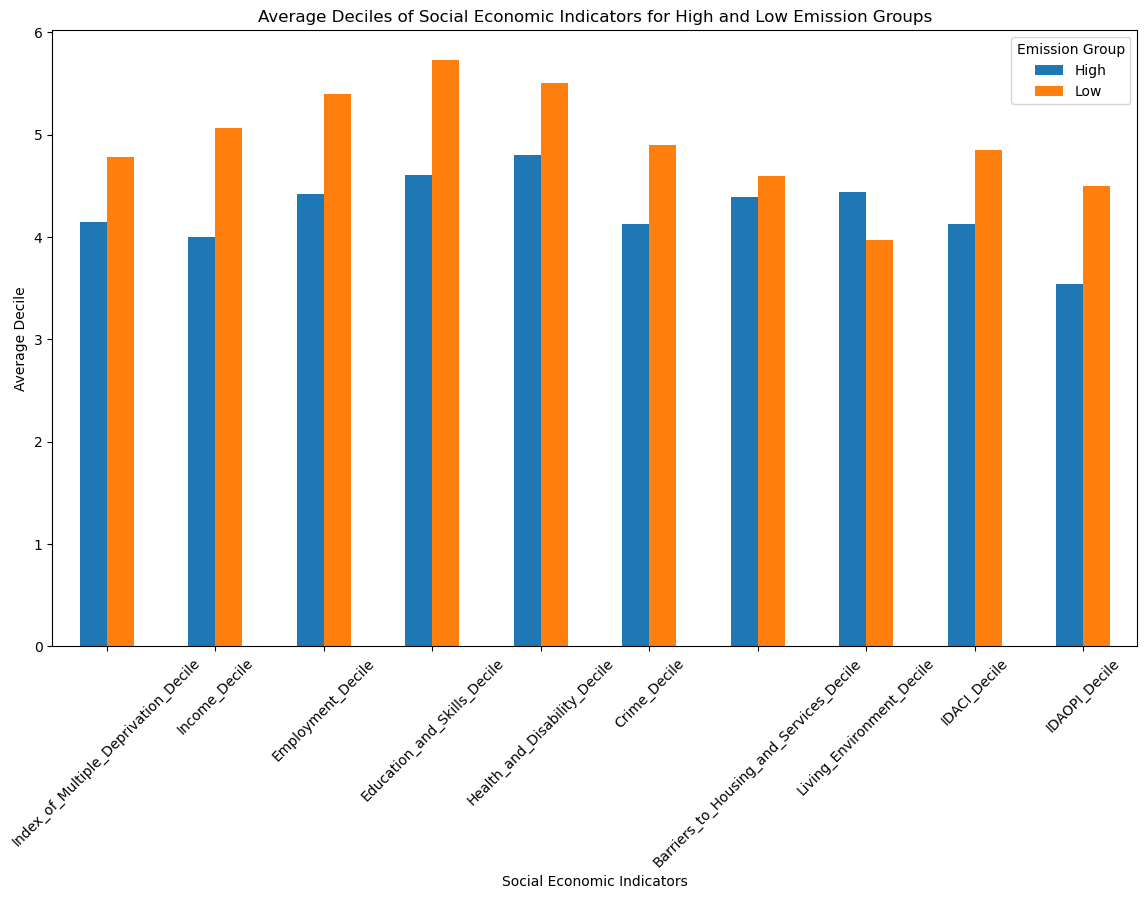

In [15]:
import matplotlib.pyplot as plt

# 可视化每个社会经济指标的平均值
imd_analysis.set_index('EmissionGroup').T.plot(kind='bar', figsize=(14, 8))
plt.title('Average Deciles of Social Economic Indicators for High and Low Emission Groups')
plt.ylabel('Average Decile')
plt.xlabel('Social Economic Indicators')
plt.xticks(rotation=45)
plt.legend(title='Emission Group')
plt.show()


In [24]:
# 保存社会经济分析结果
output_dir = './Results'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

imd_analysis.to_csv(os.path.join(output_dir, 'imd_analysis.csv'), index=False)

print("IMD analysis results saved to 'imd_analysis.csv'")


IMD analysis results saved to 'imd_analysis.csv'


In [16]:
import pandas as pd

# 读取高碳排放和低碳排放客户ID
high_emission_customers = pd.read_csv('./Results/high_emission_customers.csv')['CustomerID']
low_emission_customers = pd.read_csv('./Results/low_emission_customers.csv')['CustomerID']

# 读取交易数据
transaction_data = pd.read_excel('ekko_Data_MSc.xlsx', sheet_name='Clean_Transfers')

# 合并高碳排放客户与交易数据
high_emission_transactions = transaction_data[transaction_data['customerId'].isin(high_emission_customers)].copy()
high_emission_transactions['EmissionGroup'] = 'High'

# 合并低碳排放客户与交易数据
low_emission_transactions = transaction_data[transaction_data['customerId'].isin(low_emission_customers)].copy()
low_emission_transactions['EmissionGroup'] = 'Low'

# 合并高低碳排放交易数据
emission_transactions = pd.concat([high_emission_transactions, low_emission_transactions])

# 显示数据
emission_transactions.head()


,_id,accountId,customerId,IMD_Decile,createdAt,amount.currency,amount.exponent,amount.value,externalParty.merchantCategoryCode,externalParty.transactionCategory,MCC_List,transactionFootPrint.carbonEmissionInGrams,transactionType.code,transactionType.direction,EmissionGroup
13,62af6e01d958ab0011195f8e,62823cbf14b3eb00119a6800,81773718-8d2a-4c67-823e-19544e4ae395,2,2022-06-19T18:42:09.470Z,GBP,2,7823,3026,TRAVEL,Emirates Airlines,127393.70,REDEMPTION,DEBIT,High
15,628cdf679d48380011137742,626706abf2970e001226ce03,5754d3ec-c5f5-4b04-8f76-bc684da795e1,Not_Found,2022-05-24T13:36:39.108Z,GBP,2,15085,3043,TRAVEL,Aer Lingus,245651.80,REDEMPTION,DEBIT,High
16,61fa36d5326753001187583b,6178590764f48e00089a06ac,3253926e-9c0d-4fd9-8248-eb7c2f457b99,10,2022-02-02T07:46:29.067Z,GBP,2,25213,3245,TRAVEL,Easy Jet - EASYJET,393734.93,REDEMPTION,DEBIT,High
20,62cb56abd2806000110773e1,62a70034b61f8c00138a4b5a,248d3016-b0ad-41a3-b287-8477efdc36c4,Not_Found,2022-07-10T22:46:03.785Z,GBP,2,677,3245,TRAVEL,Easy Jet - EASYJET,10782.01,REDEMPTION,DEBIT,High
22,62226e9a4d6be300118e305b,6205a07717656e0011676f1d,886926ad-2f76-4746-a7fc-ca1473c848a3,9,2022-03-04T19:55:06.350Z,GBP,2,15500,3246,TRAVEL,Ryan Air - RYANAIR,242053.36,REDEMPTION,DEBIT,High


In [22]:
# 分析高低碳排放客户的交易金额
amount_analysis = emission_transactions.groupby('EmissionGroup')['amount.value'].agg(['mean', 'sum', 'count']).reset_index()

# 分析高低碳排放客户的商户类别分布
merchant_category_analysis = emission_transactions.groupby(['EmissionGroup', 'externalParty.merchantCategoryCode']).size().unstack(fill_value=0)

amount_analysis, merchant_category_analysis.head()




(  EmissionGroup         mean       sum  count
 0          High  3280.509069  11032352   3363
 1           Low   722.415073   2530620   3503,
 externalParty.merchantCategoryCode  3026  3043  3245  3246  3389  3504  3509  \
 EmissionGroup                                                                  
 High                                   1     1     2     2     8     1     5   
 Low                                    0     0     0     0     0     0     0   
 
 externalParty.merchantCategoryCode  3811  4111  4112  ...  8398  8641  8661  \
 EmissionGroup                                         ...                     
 High                                   1    98    51  ...    53    16     1   
 Low                                    0   382    76  ...    33     0     0   
 
 externalParty.merchantCategoryCode  8675  8699  8734  8999  9222  9399  9402  
 EmissionGroup                                                                 
 High                                   1     9   

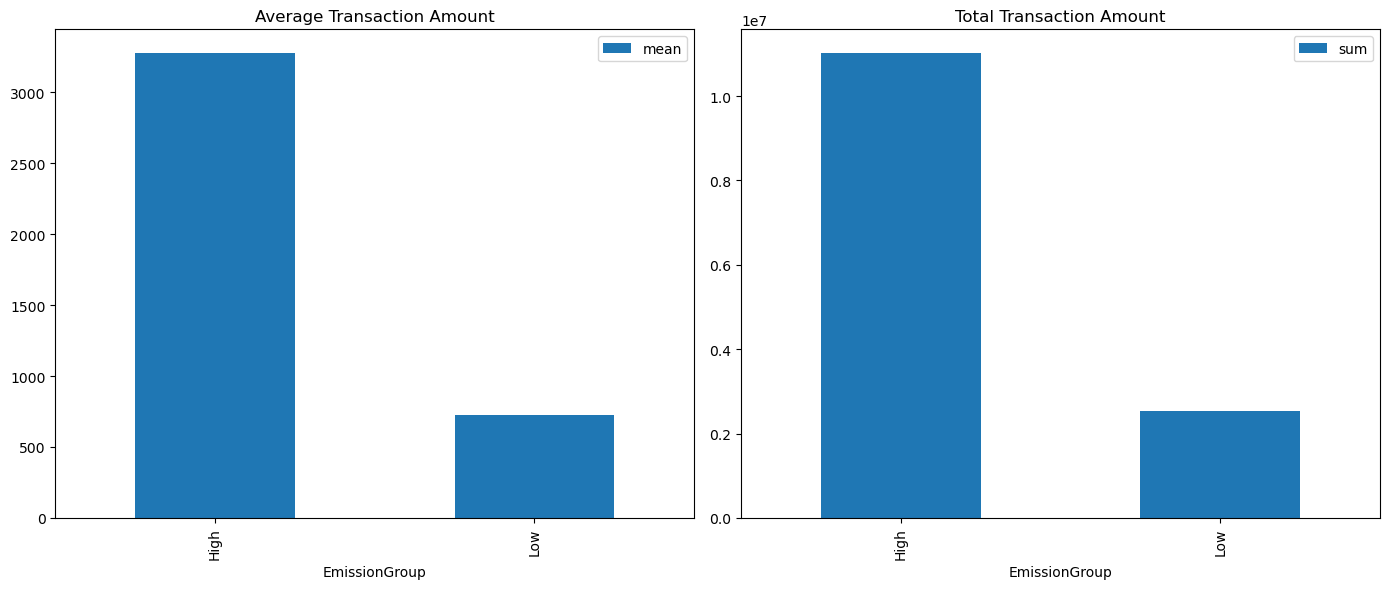

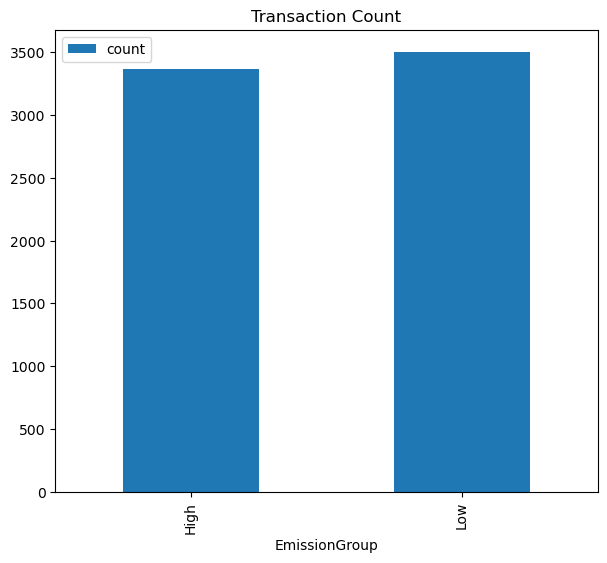

In [21]:
import matplotlib.pyplot as plt

# 可视化交易金额的平均值和总和
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
amount_analysis.plot(kind='bar', x='EmissionGroup', y='mean', ax=axes[0], title='Average Transaction Amount')
amount_analysis.plot(kind='bar', x='EmissionGroup', y='sum', ax=axes[1], title='Total Transaction Amount')

# 显示图表
plt.tight_layout()
plt.show()

# 可视化交易次数
amount_analysis.plot(kind='bar', x='EmissionGroup', y='count', figsize=(7, 6), title='Transaction Count')
plt.show()

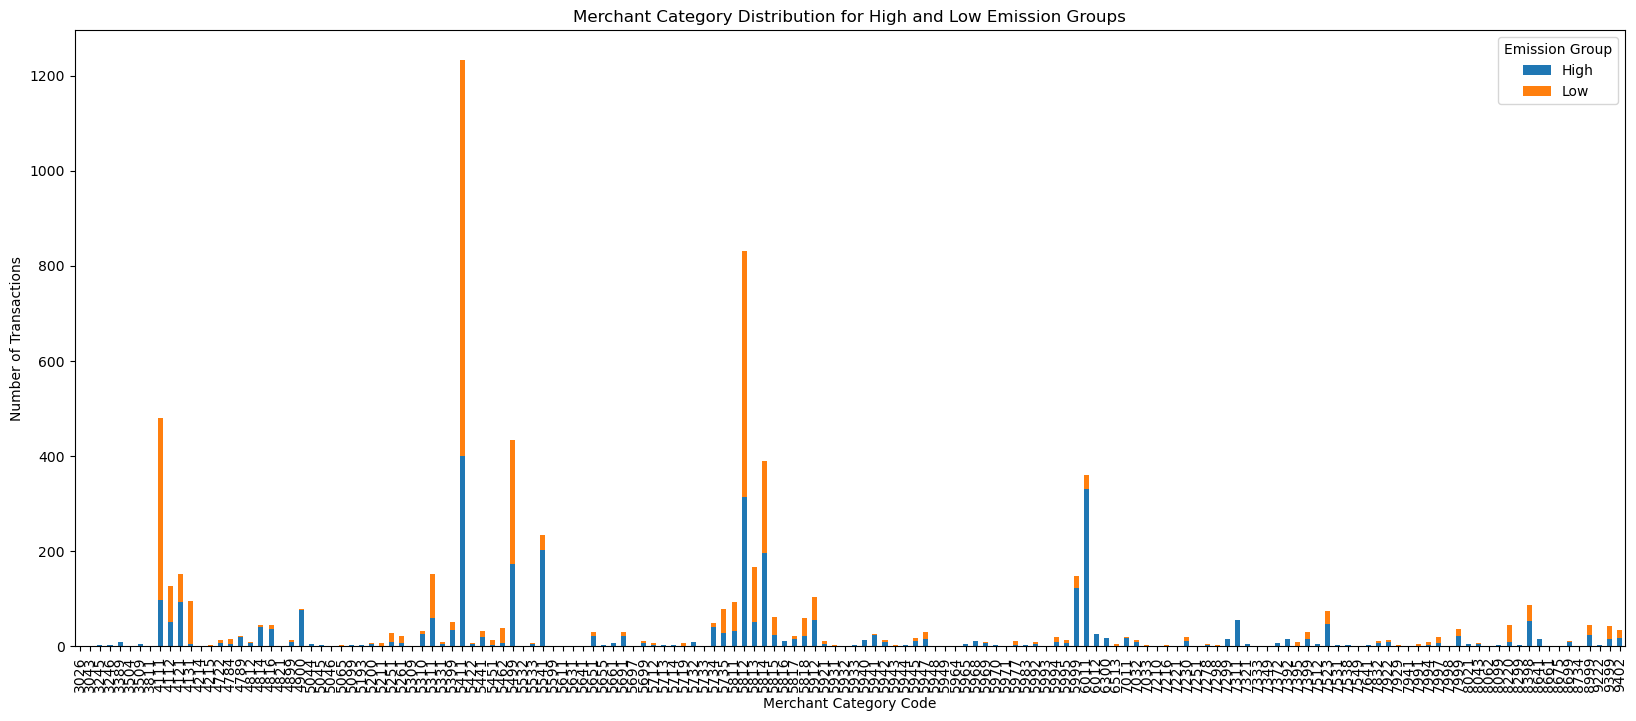

In [41]:
# 可视化商户类别分布
merchant_category_analysis.T.plot(kind='bar', stacked=True, figsize=(20, 8))
plt.title('Merchant Category Distribution for High and Low Emission Groups')
plt.xlabel('Merchant Category Code')
plt.ylabel('Number of Transactions')
plt.legend(title='Emission Group')
plt.show()


In [27]:
import pandas as pd

# 读取高碳排放和低碳排放客户ID
high_emission_customers = pd.read_csv('./Results/high_emission_customers.csv')['CustomerID']
low_emission_customers = pd.read_csv('./Results/low_emission_customers.csv')['CustomerID']

# 读取交易数据
transaction_data = pd.read_excel('ekko_Data_MSc.xlsx', sheet_name='Clean_Transfers')

# 合并高碳排放客户与交易数据
high_emission_transactions = transaction_data[transaction_data['customerId'].isin(high_emission_customers)].copy()
high_emission_transactions['EmissionGroup'] = 'High'

# 合并低碳排放客户与交易数据
low_emission_transactions = transaction_data[transaction_data['customerId'].isin(low_emission_customers)].copy()
low_emission_transactions['EmissionGroup'] = 'Low'

# 合并高低碳排放交易数据
emission_transactions = pd.concat([high_emission_transactions, low_emission_transactions])

# 显示数据
emission_transactions.head()


,_id,accountId,customerId,IMD_Decile,createdAt,amount.currency,amount.exponent,amount.value,externalParty.merchantCategoryCode,externalParty.transactionCategory,MCC_List,transactionFootPrint.carbonEmissionInGrams,transactionType.code,transactionType.direction,EmissionGroup
13,62af6e01d958ab0011195f8e,62823cbf14b3eb00119a6800,81773718-8d2a-4c67-823e-19544e4ae395,2,2022-06-19T18:42:09.470Z,GBP,2,7823,3026,TRAVEL,Emirates Airlines,127393.70,REDEMPTION,DEBIT,High
15,628cdf679d48380011137742,626706abf2970e001226ce03,5754d3ec-c5f5-4b04-8f76-bc684da795e1,Not_Found,2022-05-24T13:36:39.108Z,GBP,2,15085,3043,TRAVEL,Aer Lingus,245651.80,REDEMPTION,DEBIT,High
16,61fa36d5326753001187583b,6178590764f48e00089a06ac,3253926e-9c0d-4fd9-8248-eb7c2f457b99,10,2022-02-02T07:46:29.067Z,GBP,2,25213,3245,TRAVEL,Easy Jet - EASYJET,393734.93,REDEMPTION,DEBIT,High
20,62cb56abd2806000110773e1,62a70034b61f8c00138a4b5a,248d3016-b0ad-41a3-b287-8477efdc36c4,Not_Found,2022-07-10T22:46:03.785Z,GBP,2,677,3245,TRAVEL,Easy Jet - EASYJET,10782.01,REDEMPTION,DEBIT,High
22,62226e9a4d6be300118e305b,6205a07717656e0011676f1d,886926ad-2f76-4746-a7fc-ca1473c848a3,9,2022-03-04T19:55:06.350Z,GBP,2,15500,3246,TRAVEL,Ryan Air - RYANAIR,242053.36,REDEMPTION,DEBIT,High


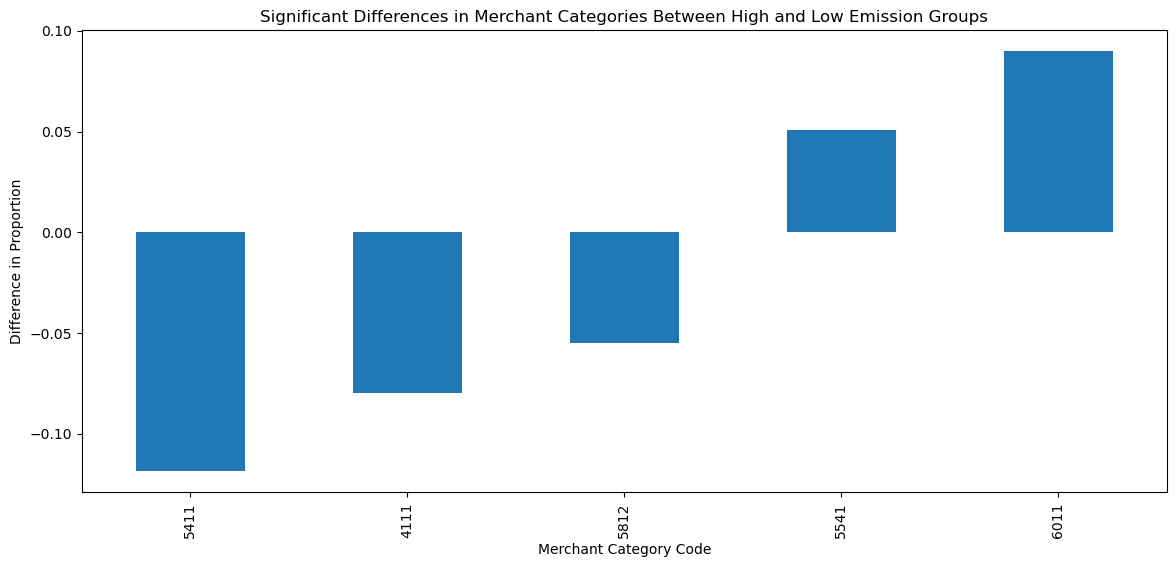

In [36]:
# 计算每个商户类别在高碳排放和低碳排放组中的交易次数
merchant_category_count = emission_transactions.groupby(['EmissionGroup', 'externalParty.merchantCategoryCode']).size().unstack(fill_value=0)

# 计算交易比例
merchant_category_proportion = merchant_category_count.div(merchant_category_count.sum(axis=1), axis=0)

# 计算交易次数差异
merchant_category_diff = merchant_category_proportion.loc['High'] - merchant_category_proportion.loc['Low']

# 设定一个阈值提取差异较大的商户类别
threshold = 0.05  # 可以根据具体数据情况调整
significant_diff_categories = merchant_category_diff[abs(merchant_category_diff) > threshold].sort_values()

import matplotlib.pyplot as plt

# 可视化差异较大的商户类别
significant_diff_categories.plot(kind='bar', figsize=(14, 6))
plt.title('Significant Differences in Merchant Categories Between High and Low Emission Groups')
plt.xlabel('Merchant Category Code')
plt.ylabel('Difference in Proportion')
plt.show()




In [38]:
# 创建输出目录
output_dir = './Results'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# 保存差异较大的商户类别
#significant_diff_categories.to_csv(os.path.join(output_dir, 'significant_diff_categories.csv'))

print("Significant differences in merchant categories saved to 'significant_diff_categories.csv'")


Significant differences in merchant categories saved to 'significant_diff_categories.csv'


# 地理

In [50]:
import pandas as pd

# Read the Clean_Transfers data
clean_transfers = pd.read_excel('ekko_Data_MSc.xlsx', sheet_name='Clean_Transfers')

# Read the ekko_customer_info data
customer_info = pd.read_excel('ekko_Data_MSc.xlsx', sheet_name='ekko_customer_info')

# Read high and low emission customer IDs
high_emission_customers = pd.read_csv('./Results/high_emission_customers.csv')['CustomerID']
low_emission_customers = pd.read_csv('./Results/low_emission_customers.csv')['CustomerID']

# Display the head of the dataframes to ensure they are read correctly
clean_transfers.head(), customer_info.head()
# Merge customer info with Clean_Transfers data to get city information
merged_high = pd.merge(high_emission_customers, customer_info, left_on='CustomerID', right_on='Sender_customer_Id', how='left')
merged_low = pd.merge(low_emission_customers, customer_info, left_on='CustomerID', right_on='Sender_customer_Id', how='left')

# Select relevant columns
high_emission_city = merged_high[['CustomerID', 'address.townOrCity']]
low_emission_city = merged_low[['CustomerID', 'address.townOrCity']]

# Count the number of high emission customers in each city
high_city_counts = high_emission_city['address.townOrCity'].value_counts().reset_index()
high_city_counts.columns = ['City', 'HighEmissionCount']

# Count the number of low emission customers in each city
low_city_counts = low_emission_city['address.townOrCity'].value_counts().reset_index()
low_city_counts.columns = ['City', 'LowEmissionCount']

# Merge high and low emission city counts
city_counts = pd.merge(high_city_counts, low_city_counts, on='City', how='outer').fillna(0)

# Sort cities by the number of high emission customers
sorted_high_cities = city_counts.sort_values(by='HighEmissionCount', ascending=False)
sorted_low_cities = city_counts.sort_values(by='LowEmissionCount', ascending=False)

# Select top cities (for example, top 5)
top_high_cities = sorted_high_cities.head(5)
top_low_cities = sorted_low_cities.head(5)

top_high_cities, top_low_cities


(          City  HighEmissionCount  LowEmissionCount
 56      London               20.0              13.0
 52       Leeds                5.0               1.0
 42     Glasgow                4.0               0.0
 12  Birmingham                4.0               0.0
 43       Grays                3.0               0.0,
            City  HighEmissionCount  LowEmissionCount
 56       London               20.0              13.0
 27     Coventry                2.0               3.0
 44     Guernsey                0.0               2.0
 4        Bangor                0.0               2.0
 83  Southampton                0.0               2.0)

# 时间

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据
df = pd.read_excel('ekko_Data_MSc.xlsx', sheet_name='Clean_Transfers')
customer_clusters = pd.read_csv('./Results/customer_clusters.csv')

# 查看数据结构
df.head(), customer_clusters.head()

# 读取高碳排放和低碳排放客户ID
high_emission_customers = pd.read_csv('./Results/high_emission_customers.csv')['CustomerID']
low_emission_customers = pd.read_csv('./Results/low_emission_customers.csv')['CustomerID']

# 合并客户聚类数据和交易数据
merged_df = pd.merge(customer_clusters, df[['customerId', 'createdAt', 'amount.value']], 
                     left_on='CustomerID', right_on='customerId', how='left')

# 标记高碳排放和低碳排放客户
merged_df['EmissionGroup'] = merged_df['CustomerID'].apply(lambda x: 'High' if x in high_emission_customers.values else ('Low' if x in low_emission_customers.values else 'Medium'))

# 查看合并后的数据
merged_df.head()





,ClusterID,CustomerID,Probability,customerId,createdAt,amount.value,EmissionGroup
0,0,4ec3aa2c-1dcd-47a7-b20c-ce7083ddbab8,1.0,4ec3aa2c-1dcd-47a7-b20c-ce7083ddbab8,2022-03-03T13:55:45.434Z,5067,Medium
1,0,4ec3aa2c-1dcd-47a7-b20c-ce7083ddbab8,1.0,4ec3aa2c-1dcd-47a7-b20c-ce7083ddbab8,2022-02-19T15:05:44.900Z,2000,Medium
2,0,4ec3aa2c-1dcd-47a7-b20c-ce7083ddbab8,1.0,4ec3aa2c-1dcd-47a7-b20c-ce7083ddbab8,2022-01-30T11:37:55.745Z,980,Medium
3,0,4ec3aa2c-1dcd-47a7-b20c-ce7083ddbab8,1.0,4ec3aa2c-1dcd-47a7-b20c-ce7083ddbab8,2022-02-08T06:23:53.193Z,1040,Medium
4,0,4ec3aa2c-1dcd-47a7-b20c-ce7083ddbab8,1.0,4ec3aa2c-1dcd-47a7-b20c-ce7083ddbab8,2022-02-09T14:09:05.329Z,1040,Medium


/tmp/ipykernel_1470/1758552487.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  time_series_analysis = merged_df.groupby([merged_df['createdAt'].dt.to_period('M'), 'EmissionGroup'])['amount.value'].mean().unstack()


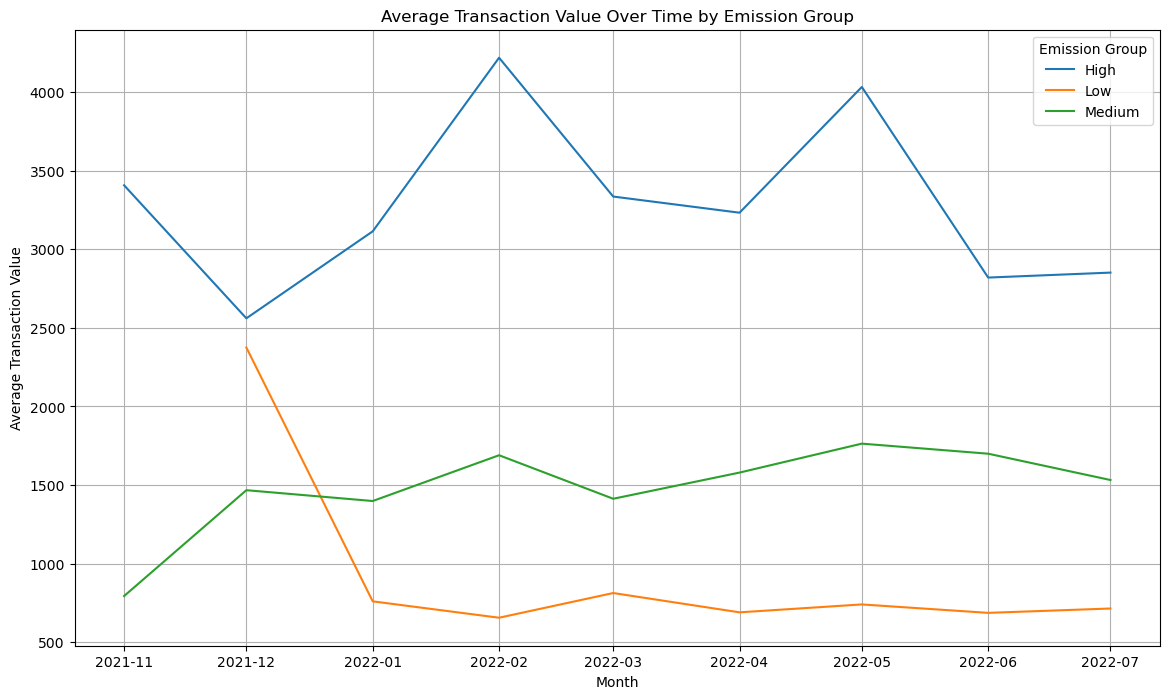

In [59]:
# 转换日期格式
merged_df['createdAt'] = pd.to_datetime(merged_df['createdAt'])

# 分组计算每个月的平均消费金额
time_series_analysis = merged_df.groupby([merged_df['createdAt'].dt.to_period('M'), 'EmissionGroup'])['amount.value'].mean().unstack()

# 绘制时间序列图
plt.figure(figsize=(14, 8))
for group in time_series_analysis.columns:
    plt.plot(time_series_analysis.index.to_timestamp(), time_series_analysis[group], label=group)
plt.xlabel('Month')
plt.ylabel('Average Transaction Value')
plt.title('Average Transaction Value Over Time by Emission Group')
plt.legend(title='Emission Group')
plt.grid(True)
plt.show()
